# Neurális hálózatok házi feladat  

---



# **Image Classification with Dogs**

készítette:

Tugyi Beatrix   - T63K63

Hujbert Patrik  - D83AE5

---



## **Feladatleírás**

A választott feladat képosztályozás:
A háló bemenete tesztképek halmaza lesz, kimenete pedig egyetlen tipp, hogy mit ábrázol a kép.

*Képhalmaz*: 50 különböző fajú kutya, fajtánként *150-200* db különböző kép.

Képek forrása: StandfordDogs: http://vision.stanford.edu/aditya86/ImageNetDogs

A feladat 2 fő része:
*   Saját CNN háló összeállítása és tanítása
*   *Transfer Lerning*-gel különböző hálók használata (AlexNet, VGG, ResNet, GoogleNet, DenseNet), a mi adatainkon.

Célunk a különböző architechtúrákat egymással, valamint a saját hálónkkal való összehasonlítása. Ennek érdekében a tanításokat mindegyiknél ugyanazokkal a hiperparaméterekkel végeztük el.

**Használt keretrendszer és nyelvek**: Google Colab, Python nyelv, Pytorch könyvtár

---
---




# **I. Dataset összeálláítása**

Minden képosztályozási feladat legelső fontos része az adatok megfelelő előkészítése, ebben a szakaszban ez található.

Kezdetben a kiválasztott képeket importáljuk, leteszteljük, hogy ez jól működött-e. Ezután szétválasztjuk őket tanító, tesztelő és validációs részekre, egységes méretűvé transzformáljuk őket és augmentáljuk a teszthalmaz elemeit. Legvégül DataLoader osztály segítségével 64 méretű batch-ekre osztjuk mindhárom adatosztályt.

### **1. Adathalmaz importálása**




In [ ]:
! wget http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar
! tar -xf ./images.tar &>/dev/null

--2022-05-23 13:40:59--  http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar
Resolving vision.stanford.edu (vision.stanford.edu)... 171.64.68.10
Connecting to vision.stanford.edu (vision.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 793579520 (757M) [application/x-tar]
Saving to: ‘images.tar’

images.tar          100%[===================>] 756.82M  5.19MB/s    in 2m 10s  

2022-05-23 13:43:09 (5.81 MB/s) - ‘images.tar’ saved [793579520/793579520]



### **2. Az 50 darab általunk kiválasztott kutyafaj képeinek kigyűjtése a chosen_images mappába**

Az adathalmaz eredetileg 120 kutyafajt tartalmaz, de a Google Colab CPU és memória korlátai miatt kevesebbel dolgoztunk.

A kutyafajokat véletlenszerűen választottuk ki a 120 közül és mindegyik modellen ugyanazokat fogjuk használni.


In [ ]:
!mkdir chosen_images

!cp -r Images/n02085620-Chihuahua chosen_images
!cp -r Images/n02085782-Japanese_spaniel chosen_images
!cp -r Images/n02085936-Maltese_dog chosen_images
!cp -r Images/n02086079-Pekinese chosen_images
!cp -r Images/n02086240-Shih-Tzu chosen_images
!cp -r Images/n02086646-Blenheim_spaniel chosen_images
!cp -r Images/n02086910-papillon chosen_images
!cp -r Images/n02087046-toy_terrier chosen_images
!cp -r Images/n02087394-Rhodesian_ridgeback chosen_images
!cp -r Images/n02088094-Afghan_hound chosen_images
!cp -r Images/n02088238-basset chosen_images
!cp -r Images/n02088364-beagle chosen_images
!cp -r Images/n02088466-bloodhound chosen_images
!cp -r Images/n02088632-bluetick chosen_images
!cp -r Images/n02089078-black-and-tan_coonhound  chosen_images
!cp -r Images/n02089867-Walker_hound chosen_images
!cp -r Images/n02089973-English_foxhound chosen_images
!cp -r Images/n02090379-redbone chosen_images
!cp -r Images/n02090622-borzoi chosen_images
!cp -r Images/n02107574-Greater_Swiss_Mountain_dog chosen_images
!cp -r Images/n02091032-Italian_greyhound chosen_images
!cp -r Images/n02091134-whippet chosen_images
!cp -r Images/n02091244-Ibizan_hound chosen_images
!cp -r Images/n02091467-Norwegian_elkhound chosen_images
!cp -r Images/n02091635-otterhound chosen_images
!cp -r Images/n02091831-Saluki chosen_images
!cp -r Images/n02092002-Scottish_deerhound chosen_images
!cp -r Images/n02092339-Weimaraner chosen_images
!cp -r Images/n02110958-pug chosen_images
!cp -r Images/n02093428-American_Staffordshire_terrier chosen_images
!cp -r Images/n02093647-Bedlington_terrier chosen_images
!cp -r Images/n02093754-Border_terrier chosen_images
!cp -r Images/n02093859-Kerry_blue_terrier chosen_images
!cp -r Images/n02113978-Mexican_hairless chosen_images
!cp -r Images/n02106166-Border_collie chosen_images
!cp -r Images/n02101556-clumber chosen_images
!cp -r Images/n02094433-Yorkshire_terrier chosen_images
!cp -r Images/n02115641-dingo chosen_images
!cp -r Images/n02095570-Lakeland_terrier chosen_images
!cp -r Images/n02095889-Sealyham_terrier chosen_images
!cp -r Images/n02106550-Rottweiler chosen_images
!cp -r Images/n02104029-kuvasz chosen_images
!cp -r Images/n02100583-vizsla chosen_images
!cp -r Images/n02099601-golden_retriever chosen_images
!cp -r Images/n02096585-Boston_bull chosen_images
!cp -r Images/n02110185-Siberian_husky chosen_images
!cp -r Images/n02107142-Doberman chosen_images
!cp -r Images/n02097209-standard_schnauzer chosen_images
!cp -r Images/n02105855-Shetland_sheepdog chosen_images
!cp -r Images/n02097474-Tibetan_terrier chosen_images

mkdir: cannot create directory ‘chosen_images’: File exists


### **3. Ellenőrzés**
**hossz (Ha a betöltés jól működött 8798 db képunk van és 50 osztáylunk) & megfelelő cimkék**

In [ ]:
from torchvision.datasets import ImageFolder
dataset = ImageFolder('./chosen_images')
print("Összes kép száma: ")
print(len(dataset))
print("Osztályok száma:")
print(len(dataset.classes))

Összes kép száma: 
8798
Osztályok száma:
50


**Osztályok nevének kinyerése egy külön listába (felesleges előtag azonosító törlése a nevekből.)**

In [ ]:
breeds = []
def rename(name):
    return ' '.join(' '.join(name.split('-')[1:]).split('_'))

for n in dataset.classes:
    breeds.append(rename(n))

**Melyik fajta képből hány db található**

In [ ]:
import os
for n in dataset.classes:
  print( rename(n), ':\t', len(os.listdir('./chosen_images' + '/' + n)))

Chihuahua :	 152
Japanese spaniel :	 185
Maltese dog :	 252
Pekinese :	 149
Shih Tzu :	 214
Blenheim spaniel :	 188
papillon :	 196
toy terrier :	 172
Rhodesian ridgeback :	 172
Afghan hound :	 239
basset :	 175
beagle :	 195
bloodhound :	 187
bluetick :	 171
black and tan coonhound :	 159
Walker hound :	 153
English foxhound :	 157
redbone :	 148
borzoi :	 151
Italian greyhound :	 182
whippet :	 187
Ibizan hound :	 188
Norwegian elkhound :	 196
otterhound :	 151
Saluki :	 200
Scottish deerhound :	 232
Weimaraner :	 160
American Staffordshire terrier :	 164
Bedlington terrier :	 182
Border terrier :	 172
Kerry blue terrier :	 179
Yorkshire terrier :	 164
Lakeland terrier :	 197
Sealyham terrier :	 202
Boston bull :	 182
standard schnauzer :	 155
Tibetan terrier :	 206
golden retriever :	 150
vizsla :	 154
clumber :	 150
kuvasz :	 150
Shetland sheepdog :	 157
Border collie :	 150
Rottweiler :	 152
Doberman :	 150
Greater Swiss Mountain dog :	 168
Siberian husky :	 192
pug :	 200
Mexican

### **4. Egy példakép kirajzolása**

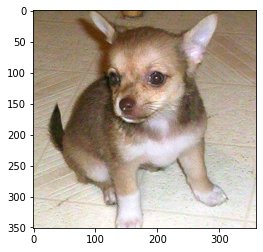

In [ ]:
import matplotlib.pyplot as plt
img, label = dataset[18]
plt.imshow(img);

### **5. Tanító, validáló és tesztelő képek véletlenszerű különválasztása**

In [ ]:
from torch.utils.data import random_split

test_p = 0.2  # tesztképek aránya az összes képhez képest
val_p = 0.1   # validációs képek aránya, a tanítóhalmazhoz képest
test_size = int(test_p * len(dataset))
train_size = len(dataset) - test_size
val_size = int(train_size*val_p)
train_size = train_size - val_size

train_ds, valid_ds,  test_ds  = random_split(dataset, [train_size, val_size, test_size])
#Kapott halmazok hossza, ellenőrzésképpen                             
len(train_ds), len(valid_ds),  len(test_ds)

(6336, 703, 1759)

### **6. Saját Dataset kialakítása a képek tárolásához és kezeléséhez** 

In [ ]:
from torch.utils.data import Dataset
class DogBreedDataset(Dataset):  
    def __init__(self, ds, transform=None):
        self.ds = ds
        self.transform = transform
        
    def __len__(self):
        return len(self.ds)
    
    def __getitem__(self, idx):
        img, label = self.ds[idx]
        if self.transform:
            img = self.transform(img)  
            return img, label

### **7. Egyszerű transzformációk elvégzése a képeken**
- a tanító halmaz képeit átméretezzük, vágjuk, forgatjuk és tükrözzük majd Tensorokká alakítjuk
- a validációs és teszt képeknek csak a méretét állítjuk egységesre, majd tensorrá alakítjuk őket
- a tanító halmazon belül megduplázzuk az adatokat, különböző transzformációkkal

In [ ]:
import torch
import torchvision.transforms as transforms

train_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomCrop(224, padding=4, padding_mode='reflect'),
    transforms.RandomHorizontalFlip(p=0.3),
    transforms.RandomRotation(degrees=30),
    transforms.ToTensor(),  
])

val_and_test_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
])

train_dataset = DogBreedDataset(train_ds, train_transform) +  DogBreedDataset(train_ds, train_transform) 
val_dataset = DogBreedDataset(valid_ds, val_and_test_transform)
test_dataset = DogBreedDataset(test_ds, val_and_test_transform)

## **8. Transzformáció utáni tesztkép**

34


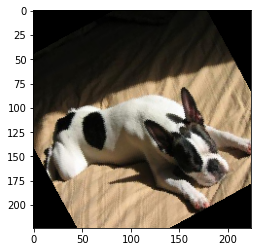

In [ ]:
img, label = train_dataset[6]
print(label)
plt.imshow(img.permute(1,2,0))

### **9. DataSet -> DataLoader**

In [ ]:
from torch.utils.data.dataloader import DataLoader

batch_size = 64
train_dl = DataLoader(train_dataset, batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_dl = DataLoader(val_dataset, batch_size*2, num_workers=2, pin_memory=True)
test_dl = DataLoader(test_dataset, batch_size*2, num_workers=2, pin_memory=True)

### **10. Egy batch képeinek megjelenítése**

In [ ]:
from torchvision.utils import make_grid

def show_batch(dl):
    for image, lb in dl:
        fig, ax = plt.subplots(figsize=(16, 8))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(image.cpu(), nrow=16).permute(1,2,0))
        break

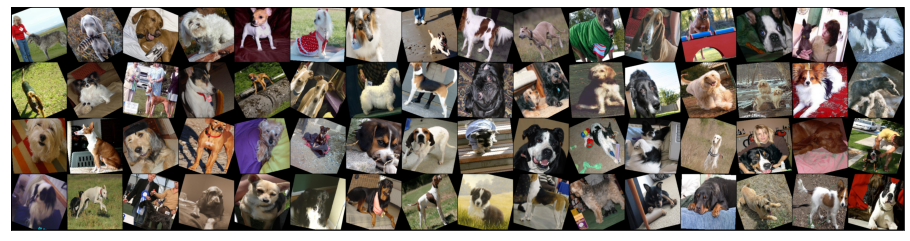

In [ ]:
show_batch(train_dl)



---


#**II. GPU használatának beállítása**

---





In [ ]:
import torch
def get_default_device():
  if torch.cuda.is_available():
    return torch.device('cuda')
  else:
    torch.device('cpu')
#CUDA meglétének ellenőrzése
device = get_default_device()
device

device(type='cuda')

Adatok GPU-ra való átmásolását végző függvény

In [ ]:
def to_device(data, device):
  if isinstance(data, (list, tuple)):
    return [to_device(x, device) for x in data]
  return data.to(device, non_blocking=True)

In [ ]:
class DeviceDataLoader():
  def __init__(self, dl, device):
    self.dl = dl 
    self.device = device

  def __iter__(self):
    for b in self.dl:
      yield to_device(b, self.device)

  def __len__(self):
    return len(self.dl)

### **Adathalmazok áthelyezése a GPU-ra**

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
test_dl = DeviceDataLoader(test_dl, device)

# **III. Base Model létrehozása**
---



Minden CNN-t az nn.Module ősosztályból szoktak leszármaztatni. Mi ebből a több modell egységessége és kódduplikáció elkerülése érdekében leszármaztattunk még egy osztályt (ImageClassificationBase), melyben implementálva van a tanító és a validációs lépés valamint az eredmények kiiratása. Minden általunk készített vagy használt modelt ebből fogunk származtatni.

**szükséges inportok**

In [ ]:
import torch.nn.functional as F
import torch.nn as nn
from tqdm.notebook import tqdm #a progress bár esztétikus megjelenítésére
import torchvision.models as models #transfer learninghez használt modellek eléréséhez

**Segédfüggvény a pontosság meghatározásához**

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

**Base modellosztály, a használt modellekhez**

In [ ]:
class ImageClassificationBase(nn.Module):
    # tanító lépés
    def training_step(self, batch):
        img, targets = batch
        out = self(img)
        loss = F.nll_loss(out, targets) #használt költségfüggvény: Negative log likelihood loss
        return loss
    
    # validációs lépés
    def validation_step(self, batch):
        img, targets = batch
        out = self(img)
        loss = F.nll_loss(out, targets)
        acc = accuracy(out, targets)
        return {'val_acc':acc.detach(), 'val_loss':loss.detach()}
    
    # validációs lépés az epoch-kok végén
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        return {'val_loss':epoch_loss.item(), 'val_acc':epoch_acc.item()}
        
    # Eredmény kiiratása az epoch végén
    def epoch_end(self, epoch, result):
        print("Epoch [{}] : train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}"
        .format(epoch, result["train_loss"], result["val_loss"], result["val_acc"]))
        

### **2. Tanítási algoritmus implementálása**

*A tanításhoz mindig ugyanazokat a hiperparamétereket használjuk, a modellek összehasonlításának céljából.*

A tanító fv-t a *fit_one_cycle* hívásával lehet elindítani, melynek paraméterei:

**epochs:**  A tanítási ciklusok (epoch-ok) száma

**max_lr:**  A *torch.optim.lr_scheduler.OneCycleLR* függvénnyel optimalizálunk, mely a bátorsági tényezőnket ciklikusan változtatni fogja, ezért paraméterként nem a *learning rate*-et, hanem a *maximum learning rate*-et adjuk. 

**model:** Az aktuálisan választott model

**train_loader:** A tanító képhalmaz

**val_loader** A validációs képhalmaz

**weight_decay:** Weigh decay használatának mértéke

**grad_clip:** Ezt a gradiensek elszállásának megelőzése érdekében használjuk, az esetleges outlier értékeket szorítja vissza.

**opt_func:** A használni kívánt optimalizációs függvény.




In [ ]:
def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']
        
def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, weight_decay=0, grad_clip=None, opt_func):
    torch.cuda.empty_cache()
    history = []
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # beállítása a ciklikus learning rate ütemezőnek
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, steps_per_epoch=len(train_loader))
    for epoch in range(epochs):      
        # Tanítás
        model.train()       
        train_losses = []
        lrs = []
        for batch in tqdm(train_loader):
            loss = model.training_step(batch)
            train_losses.append(loss)       
            # Gradiensek visszaterjesztése
            loss.backward()            
            # gradient clip szükségességének ellenőrzése és esetleges elvégzése
            if grad_clip:
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)              
            # gradient descent során a súlyok változtatása
            optimizer.step()           
            # gradiensek értékeinek resetelése
            optimizer.zero_grad()         
            # learning rate elmentése, frissítése és módosítása
            lrs.append(get_lr(optimizer))          
            sched.step()
            
        # Validációs fázis
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
             
    return history

#teszt és validációs halmaz kiértékeléséhez, fontos hogy itt nem változtatjuk a gradienseket
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

---
# **TANÍTÁSOK A KÜLÖNBÖZŐ MODELLEKEN**
---

Elsőként mi építettünk fel egy saját CNN-t és ennek a hálónak az eredményességét vizsgáltuk. Többféle modellt is kioróbáltunk, a legjobb értékeket az itt található hálóval sikerült elérnünk.

Ezután pedig következik a tanítás elvégzése az ImageNet versenyen híresé vált CNN-ek használata, *Transfer Learning* segítségével.

A különböző modellek tanítását külön Notebookban futtatuk, mert a Google Colab memóriája nem bírta el mindet és összeomlott. Tanítás után viszont minden eredményt ebbe a Notebook-ba másoltunk át. *(A másolás miatt azonban a tanítási ciklusokban a progressbar értékei eltüntek, de ami a lényeg, a költség és a pontosság az így is jól látható. )*

# **Saját Konvolúciós hálózatunk**
---

A modell fokozatosan lett felépítve, egyre több réteget alkalmazva, bonyolultabb struktúrával.
A végső alább látható modellben 10 konvoluciós réteg található, a csatornák számának folyamatos növelésével, 3as méretű kernellel, 1es stride-al és padding-el. A rétegek csoportjai között a konvolúciós hálók jól ismert eszközét a poolingot került használatra, ez a MaxPool2d-vel lett megvalósítva.
A konvolúciós rétegeket egy teljesen összekötött háló követi, dropout rétegekkel (ezzel javítva a teljesítményén).
A modell ebben az állapotában ugyan alkalmas volt a tanulásra, azonban ezen a méretű adathalmazon rendkívül lassan tanult. A hatékonyság növelésében a batch normalizáció segített, ez minden második réteg után van alkalmazva. Nagyban gyorsította a tanulást és így már könnyen lehetett felmutatható eredményeket elérni a modellel, ez alább látható is.

### **Modell definiálása**

In [ ]:
class ConvNet(ImageClassificationBase):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 40, 3, 1, 1)
        self.conv2 = nn.Conv2d(40, 40, 3, 1, 1)
        self.conv3 = nn.Conv2d(40, 80, 3, 1, 1)
        self.conv4 = nn.Conv2d(80, 80, 3, 1, 1)
        self.conv5 = nn.Conv2d(80, 120, 3, 1, 1)
        self.conv6 = nn.Conv2d(120, 120, 3, 1, 1)
        self.conv7 = nn.Conv2d(120, 160, 3, 1, 1)
        self.conv8 = nn.Conv2d(160, 160, 3, 1, 1)
        self.conv9 = nn.Conv2d(160, 200, 3, 1, 1)
        self.conv10 = nn.Conv2d(200, 200, 3, 1, 1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(200 * 7 * 7, 4092)
        self.fc2 = nn.Linear(4092, 4092)
        self.fc3 = nn.Linear(4092, 50)
        self.dropout = nn.Dropout(p=0.5, inplace=False)
        self.logsoft = nn.LogSoftmax(dim=1)
        self.batchnorm1 = nn.BatchNorm2d(40)
        self.batchnorm3 = nn.BatchNorm2d(80)
        self.batchnorm5 = nn.BatchNorm2d(120)
        self.batchnorm7 = nn.BatchNorm2d(160)
        self.batchnorm9 = nn.BatchNorm2d(200)
        

    def forward(self, x):
        x = self.batchnorm1(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.batchnorm3(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = self.batchnorm5(F.relu(self.conv5(x)))
        x = self.pool(F.relu(self.conv6(x)))
        x = self.batchnorm7(F.relu(self.conv7(x)))
        x = self.pool(F.relu(self.conv8(x)))
        x = self.batchnorm9(F.relu(self.conv9(x)))
        x = self.pool(F.relu(self.conv10(x)))
        x = x.view(-1, 200 * 7 * 7)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.fc3(x)
        x = self.logsoft(x)
        return x

### **2. Modell példányosítása**

In [ ]:
model = ConvNet()
model

ConvNet(
  (conv1): Conv2d(3, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(40, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(40, 80, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(80, 80, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(80, 120, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(120, 120, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv7): Conv2d(120, 160, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv8): Conv2d(160, 160, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv9): Conv2d(160, 200, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv10): Conv2d(200, 200, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=9800, out_features=4092, bias=True)
  (fc2): Linear(in_features=4092, out_features=4092, bias=Tru

*Háló áthelyezése a GPU-ra*

In [ ]:
to_device(model, device);

### **3. Modell kiértékeklése tanítás előtt: 2%**

In [ ]:
evaluate(model, test_dl)

{'val_acc': 0.020283129066228867, 'val_loss': 3.9121463298797607}

### **4. Saját modell tanítása**

 **Hiperparaméterek beállítása**

In [ ]:
num_epochs = 20
opt_func = torch.optim.SGD
max_lr = 0.001
grad_clip = 0.1
weight_decay = 1e-4

In [ ]:
history = fit_one_cycle(num_epochs, max_lr, model, train_dl, val_dl,  weight_decay, grad_clip)

  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [0] : train_loss: 3.8754, val_loss: 3.7234, val_acc: 0.0756


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [1] : train_loss: 3.5906, val_loss: 3.4924, val_acc: 0.1083


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [2] : train_loss: 3.3553, val_loss: 3.3818, val_acc: 0.1292


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [3] : train_loss: 3.1953, val_loss: 3.4220, val_acc: 0.1488


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [4] : train_loss: 3.0372, val_loss: 3.3592, val_acc: 0.1579


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [5] : train_loss: 2.9255, val_loss: 3.5630, val_acc: 0.1057


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [6] : train_loss: 2.7542, val_loss: 2.9084, val_acc: 0.2387


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [7] : train_loss: 2.5553, val_loss: 2.5578, val_acc: 0.2949


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [8] : train_loss: 2.3629, val_loss: 2.5378, val_acc: 0.3119


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [9] : train_loss: 2.2012, val_loss: 2.5078, val_acc: 0.3550


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [10] : train_loss: 2.0254, val_loss: 2.4852, val_acc: 0.3288


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [11] : train_loss: 1.8290, val_loss: 2.2743, val_acc: 0.3877


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [12] : train_loss: 1.6429, val_loss: 2.1069, val_acc: 0.4451


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [13] : train_loss: 1.4403, val_loss: 2.1120, val_acc: 0.4424


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [14] : train_loss: 1.2729, val_loss: 2.1233, val_acc: 0.4633


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [15] : train_loss: 1.0701, val_loss: 2.0810, val_acc: 0.4605


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [16] : train_loss: 0.9329, val_loss: 2.0815, val_acc: 0.4840


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [17] : train_loss: 0.8269, val_loss: 2.1437, val_acc: 0.4828


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [18] : train_loss: 0.7345, val_loss: 2.1544, val_acc: 0.4853


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [19] : train_loss: 0.7357, val_loss: 2.1468, val_acc: 0.4854


## **Teszthalmazon a végeredmény: 47%**

In [ ]:
result = evaluate(model, test_dl)
result

{'val_acc': 0.4701950252056122, 'val_loss': 2.201068639755249}

## **5. Tanítás elemzése diagrammokon**

In [ ]:
val_loss = []
train_loss = []
val_acc = []
time = list(range(len(history)))
for h in history:
    val_loss.append(h['val_loss'])
    train_loss.append(h['train_loss'])
    val_acc.append(h['val_acc'])

Elsőnek az epochonként-i változását nézzük meg a validációs hibának (piros) és a tanító hibáknak (kék)

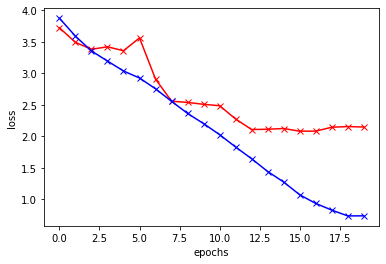

In [ ]:
plt.plot(time, val_loss, c='red', label='val_loss', marker='x')
plt.plot(time, train_loss, c='blue', label='train_loss', marker='x')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

Ebből az látható, hogy a modellünk azért nem ért el kimagaslóan jó eredményt, mert kb a 12. epoch után a modell túltanult. Ez abból látható, hogy innentől kezdve a validációs hiba nem csökken, a teszthalmazon való kiértékelés hibája azonban ugyanolyan ütemben csökken tovább mint előtte.

Itt a validációs halmaz pontosságát figyeljük epochonként.

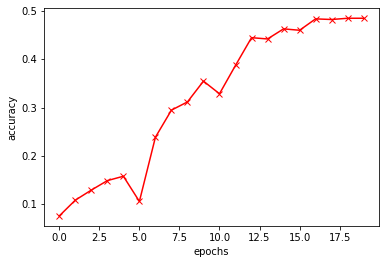

In [ ]:
plt.plot(time, val_acc, c='red', label='accuracy', marker='x')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

# **Saját ConvNet HE inicializációval**

A pytorchban biztosított alap inicializáció helyett kipróbálásra került a HE inicializáció a konvolúciós rétegek súlyainak inicializálására. A tanultak szerint ez jobb eredményekre szokott vezetni képek osztályozásánál.

### **1. Modell definiálása az előző pontnál már megtörtént**

### **2. Modell példányosítása, súlyok inicializálása HE inicializációval**

In [ ]:
from torch.nn.modules.conv import Conv2d
def init_weights(m):
    if isinstance(m, nn.Linear) or isinstance(m, nn.Conv2d):
        nn.init.kaiming_uniform_(m.weight, mode='fan_in', nonlinearity='relu')

In [ ]:
model = ConvNet()
model.apply(init_weights)
model

ConvNet(
  (conv1): Conv2d(3, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(40, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(40, 80, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(80, 80, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(80, 120, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(120, 120, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv7): Conv2d(120, 160, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv8): Conv2d(160, 160, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv9): Conv2d(160, 200, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv10): Conv2d(200, 200, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=9800, out_features=4092, bias=True)
  (fc2): Linear(in_features=4092, out_features=4092, bias=Tru

Modell áthelyezése a GPU-ra

In [ ]:
to_device(model, device);

### **3. Modell kiértékeklése tanítás előtt: 1,6%**

In [ ]:
evaluate(model, test_dl)

{'val_acc': 0.01603618450462818, 'val_loss': 4.130851745605469}

### **4. Saját modell tanítása**

### **Hiperparaméterek beállítása**

In [ ]:
num_epochs = 20
opt_func = torch.optim.SGD
max_lr = 0.001
grad_clip = 0.1
weight_decay = 1e-4

In [ ]:
history = fit_one_cycle(num_epochs, max_lr, model, train_dl, val_dl,  weight_decay, grad_clip)

  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [0] : train_loss: 4.7757, val_loss: 3.8954, val_acc: 0.0405


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [1] : train_loss: 3.9128, val_loss: 3.8075, val_acc: 0.0431


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [2] : train_loss: 3.8477, val_loss: 3.7725, val_acc: 0.0692


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [3] : train_loss: 3.8626, val_loss: 3.8045, val_acc: 0.0391


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [4] : train_loss: 3.8542, val_loss: 3.7661, val_acc: 0.0431


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [5] : train_loss: 3.7064, val_loss: 3.5394, val_acc: 0.0731


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [6] : train_loss: 3.4510, val_loss: 3.4306, val_acc: 0.1096


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [7] : train_loss: 3.2347, val_loss: 3.1700, val_acc: 0.1619


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [8] : train_loss: 3.0326, val_loss: 3.0388, val_acc: 0.1671


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [9] : train_loss: 2.8639, val_loss: 2.8998, val_acc: 0.2325


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [10] : train_loss: 2.6393, val_loss: 2.7046, val_acc: 0.2690


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [11] : train_loss: 2.4416, val_loss: 2.3834, val_acc: 0.3396


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [12] : train_loss: 2.2408, val_loss: 2.4435, val_acc: 0.3199


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [13] : train_loss: 2.0296, val_loss: 2.3225, val_acc: 0.3564


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [14] : train_loss: 1.8083, val_loss: 2.2579, val_acc: 0.4009


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [15] : train_loss: 1.5903, val_loss: 2.0689, val_acc: 0.4570


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [16] : train_loss: 1.4038, val_loss: 2.0100, val_acc: 0.4700


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [17] : train_loss: 1.2523, val_loss: 2.0554, val_acc: 0.4649


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [18] : train_loss: 1.1610, val_loss: 2.0212, val_acc: 0.4740


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [19] : train_loss: 1.0978, val_loss: 2.0382, val_acc: 0.4701


## **Teszthalmazon a végeredmény: 43%**



In [ ]:
result = evaluate(model, test_dl)
result

{'val_acc': 0.4350622594356537, 'val_loss': 2.1814727783203125}

## **5. Tanítás elemzése diagrammokon**



In [ ]:
val_loss = []
train_loss = []
val_acc = []
time = list(range(len(history)))
for h in history:
    val_loss.append(h['val_loss'])
    train_loss.append(h['train_loss'])
    val_acc.append(h['val_acc'])

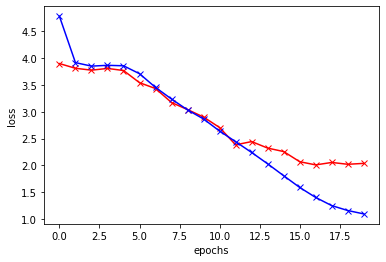

In [ ]:
plt.plot(time, val_loss, c='red', label='val_loss', marker='x')
plt.plot(time, train_loss, c='blue', label='train_loss', marker='x')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

Összességében nem sikerült ezzel az inicializációs módszerrel jobb eredményt elérni, viszont itt a háló csak később kezdett el túlilleszkedni a tanító halmazra.

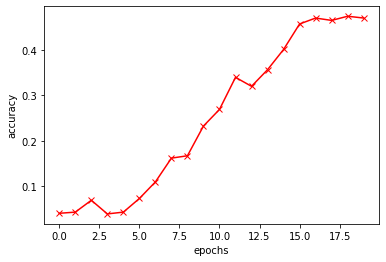

In [ ]:
plt.plot(time, val_acc, c='red', label='accuracy', marker='x')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

## **6. Modell mentése és betöltése**

In [ ]:
torch.save(model, 'CNNmodel50_20_Adam_Kaiming_uniform.pth')

In [ ]:
trainedModel = torch.load('CNNmodel50_20_Adam_Kaiming_uniform.pth')

# **Pre trained modell tanítása és kiértékelése új transzformált adathalmazon**

Transzfer tantás mintájára, a már betanított modell újra lett tanítva, de itt már új adathalmazon. Az új adathalmaz csak a transzformációkban tér el az előzőekben használt adathalmaznál.

In [ ]:
preTrainedModel = trainedModel

In [ ]:
train_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomCrop(224, padding=4, padding_mode='reflect'),
    transforms.RandomHorizontalFlip(p=0.3),
    transforms.RandomRotation(degrees=30),
    transforms.ToTensor(),  
])


val_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
])

test_transform = transforms.Compose([
    transforms.Resize((224,224)), 
    transforms.ToTensor(),
])

train_dataset = DogBreedDataset(train_ds, train_transform)
val_dataset = DogBreedDataset(valid_ds, val_transform)
test_dataset = DogBreedDataset(test_ds, test_transform)

train_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomCrop(224, padding=4, padding_mode='reflect'),
    transforms.RandomHorizontalFlip(p=0.3),
    transforms.RandomRotation(degrees=30),
    transforms.ToTensor(),  
])

train_dataset += DogBreedDataset(train_ds, train_transform)

train_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomCrop(224, padding=4, padding_mode='reflect'),
    transforms.RandomHorizontalFlip(p=0.3),
    transforms.RandomRotation(degrees=30),
    transforms.ToTensor(),  
])

train_dataset += DogBreedDataset(train_ds, train_transform)

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
test_dl = DeviceDataLoader(test_dl, device)

In [ ]:
num_epochs = 20
opt_func = torch.optim.SGD
max_lr = 0.001
grad_clip = 0.1
weight_decay = 1e-4

history = fit_one_cycle(num_epochs, max_lr, preTrainedModel, train_dl, val_dl,  weight_decay, grad_clip)

  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [0] : train_loss: 0.6678, val_loss: 2.1302, val_acc: 0.4989


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [1] : train_loss: 0.6579, val_loss: 2.2340, val_acc: 0.5067


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [2] : train_loss: 0.7438, val_loss: 2.2195, val_acc: 0.4714


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [3] : train_loss: 0.9728, val_loss: 2.2258, val_acc: 0.4481


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [4] : train_loss: 1.1442, val_loss: 2.3824, val_acc: 0.4376


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [5] : train_loss: 1.1829, val_loss: 2.9330, val_acc: 0.3511


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [6] : train_loss: 1.1777, val_loss: 2.4337, val_acc: 0.4348


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [7] : train_loss: 1.0658, val_loss: 2.1597, val_acc: 0.4610


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [8] : train_loss: 0.9746, val_loss: 2.3085, val_acc: 0.4439


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [9] : train_loss: 0.8607, val_loss: 2.2194, val_acc: 0.4689


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [10] : train_loss: 0.7575, val_loss: 2.0815, val_acc: 0.5199


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [11] : train_loss: 0.6145, val_loss: 2.2315, val_acc: 0.5368


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [12] : train_loss: 0.5178, val_loss: 2.1651, val_acc: 0.5264


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [13] : train_loss: 0.4341, val_loss: 2.1735, val_acc: 0.5342


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [14] : train_loss: 0.3423, val_loss: 2.2068, val_acc: 0.5527


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [15] : train_loss: 0.2610, val_loss: 2.2203, val_acc: 0.5616


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [16] : train_loss: 0.2312, val_loss: 2.1945, val_acc: 0.5695


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [17] : train_loss: 0.1907, val_loss: 2.2930, val_acc: 0.5642


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [18] : train_loss: 0.1806, val_loss: 2.2722, val_acc: 0.5746


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [19] : train_loss: 0.1714, val_loss: 2.2851, val_acc: 0.5733


## **Teszthalmazon a végeredmény: 49,5%**

In [ ]:
evaluate(preTrainedModel, test_dl)

{'val_acc': 0.4958881735801697, 'val_loss': 2.562298536300659}

Ennek segítségével sikerült magasabb pontosságot elérni.

In [ ]:
val_loss = []
train_loss = []
val_acc = []
time = list(range(len(history)))
for h in history:
    val_loss.append(h['val_loss'])
    train_loss.append(h['train_loss'])
    val_acc.append(h['val_acc'])

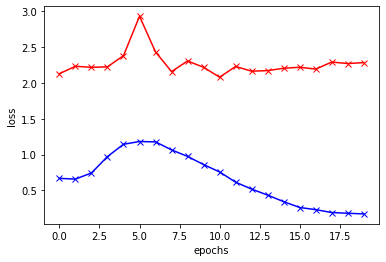

In [ ]:
plt.plot(time, val_loss, c='red', label='val_loss', marker='x')
plt.plot(time, train_loss, c='blue', label='train_loss', marker='x')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

A két függvény nagyban elkülönül egymástól, ennek oka, hogy már a kezdeti súlyinicializációnál is nagy volt a kettő közötti eltérés.

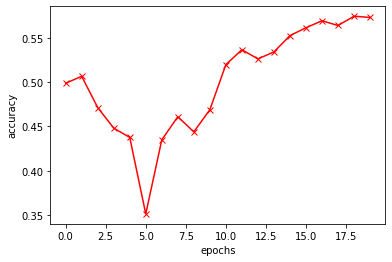

In [ ]:
plt.plot(time, val_acc, c='red', label='accuracy', marker='x')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

Az új adatokhoz való alkalmazkodás során a háló teljesítménye kezdetben leromlott, de utána sikerült az eredetinél jobb értékeket elérnie.

# **Transfer Learning**
---
---
Az *ImageNet*-en használt modellek közül 5-öt megvizsgáltunk, betanítottunk és kiértékeltünk az eredményességét a mi adathalmazunkon.

A felhasznált modellek: AlexNet, VGG, GoogleLet, ResNet és Densnet. Mindegyik az óriási ImageNet adathalmazon előre be van tanítva, ezek lesznek az inicializciós súlyok, mi csak az utolsó rétegét cseréljük le, hogy a mi adathalmazunknak megfelelő számú kimenete legyen és így indítjuk el újra a tanulást. Látható hogy így mindegyik modellnek sikerül hamar megtanulnia a legtöbb kimenetet.

# **AlexNet**
---



**Modell áttekintése:**

2012-ben ez okozta az első nagy áttörést az ImageNet történetében: ez volt az első alkalom, hogy a mély  neurális hálós modell nyert, ráadásul nagy előnnyel.
(A többi 26-28%-os hibaárányú mellett, ennek sikerült 16%-ot elérnie.) 

8db konvolúciós rétegből állt, mindegyiket egy ReLu követte. Ezen kívül tartalmazott pooling és (a legvégén) fully conected rétegeket is. Körölbelül 60 millió súlyt használtak hozzá.

További különlegessége volt, hogy 2GPU-n futtaták (ezért áll az architechtúrája két párhuzamos részből) és a későbbieknél sokkal nagyobb 11x11-es kernel méretet is hasznáktak benne.


### **1. Az AlexNet importálása és az utolsó rétegének átalakítása a mi adathamazunknak megfelelően**

In [ ]:
class DogBreedAlexNet(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        
        self.network = models.alexnet(pretrained=True)
        # Utolsó réteg helyettesítése, 50 db osztályunk van, így ennyi lesz a kimenet    
        self.network.classifier = nn.Sequential(
            nn.Linear(9216, 50),
            nn.LogSoftmax(dim=1)          
        )       
    def forward(self, xb):
        return self.network(xb)

### **2. Modell példányosítása és átvitele a GPU-ra:**

In [ ]:
AlexNetModel = DogBreedAlexNet()
AlexNetModel

In [ ]:
to_device(AlexNetModel, device);

### **3. A modell pontosságának mérése tanítás előtt: 1,8%**

In [ ]:
evaluate(AlexNetModel, test_dl)

{'val_acc': 0.018050985410809517, 'val_loss': 4.078521728515625}

### **4. AlexNet tanítása**

**Hiperparaméterek beállítása**

In [ ]:
num_epochs = 10
opt_func = torch.optim.SGD
max_lr = 0.001
grad_clip = 0.1
weight_decay = 1e-4

In [ ]:
history_AN = fit_one_cycle(num_epochs, max_lr, AlexNetModel, train_dl, val_dl, weight_decay, grad_clip, opt_func)

  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [0] : train_loss: 3.4621, val_loss: 2.4422, val_acc: 0.3289


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [1] : train_loss: 1.9193, val_loss: 1.7394, val_acc: 0.5026


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [2] : train_loss: 1.4386, val_loss: 1.5248, val_acc: 0.5534


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [3] : train_loss: 1.1836, val_loss: 1.4297, val_acc: 0.5952


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [4] : train_loss: 0.9759, val_loss: 1.4512, val_acc: 0.5874


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [5] : train_loss: 0.8335, val_loss: 1.4899, val_acc: 0.5899


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [6] : train_loss: 0.7099, val_loss: 1.4398, val_acc: 0.6214


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [7] : train_loss: 0.5932, val_loss: 1.4877, val_acc: 0.6018


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [8] : train_loss: 0.4774, val_loss: 1.4959, val_acc: 0.6149


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [9] : train_loss: 0.4177, val_loss: 1.4831, val_acc: 0.6200


### **Teszthalmazon a végeredmény: 63,3%**

In [ ]:
result_AN = evaluate(AlexNetModel, test_dl)
result_AN

{'val_acc': 0.6334527730941772, 'val_loss': 1.3830759525299072}

### **5. Tanítás elemzése diagrammokon**

In [ ]:
val_loss_AN= [], train_loss_AN = [], val_acc_AN = []
time = list(range(len(history_AN)))
for h in history_AN:
    val_loss_AN.append(h['val_loss'])
    train_loss_AN.append(h['train_loss'])
    val_acc_AN.append(h['val_acc'])

*tanító (kék) és validációs (piros) halmazokon a költség változása, epoch-onként:*

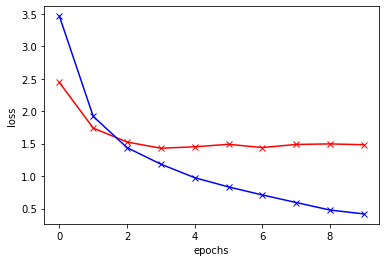

In [ ]:
plt.plot(time, val_loss_AN, c='red', label='val_loss', marker='x')
plt.plot(time, train_loss_AN, c='blue', label='train_loss', marker='x')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

Az AlexNet diagramjáról is az olvasható le, hogy a modell sajnos túltanult. Már a második epoch után látható, hogy a validációs hiba nem csökken, a modell a tanító halmaz sajátos jellemzőire tanult csak rá, annak a hibája láthatóan nagyon alacsonyra csökkent.

A 63%-os eredmény már jónak tekinthető, a modell (későbbiekhez viszonyított) kis méretéhez. A lefutási ideje is jelentősen kevés volt, kb 10 perc, ami megint csak fontos tényező lehet.

*A modell validációs halamazon elért pontossága, epoch-onként:*

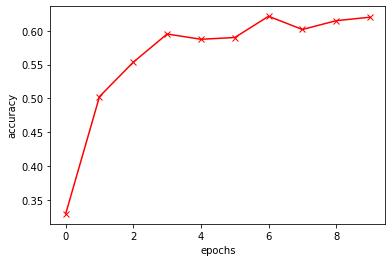

In [ ]:
plt.plot(time, val_acc_AN, c='red', label='accuracy', marker='x')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

### **6.Betanított modell elmentése és újratöltése**

In [ ]:
torch.save(AlexNetModel, 'AlexNetmodel.pth')

In [ ]:
mentett_AlexNet = torch.load('AlexNetmodel.pth')

---
# **VGG**
---

**Modell áttekintése:**

Ez a modell (Visual Geometry Group) 2014-ben indult az ImageNet-en és 7%-os hibaarányt sikerült elérnie.

A korábbiaknál mélyebb szerkezete van, 16-19db (egyre kisebb méretű) rétegből állt.

Ennél az architechtúránál több Konvolúciós réteget raktak egymás után és csak utána következett a Pooling réteg. A kernel méretét egységesen 3x3-asra vették mindenhol. A végén itt is egy Fully Connected réteg áll.


### **1. A VGG háló importálása és az utolsó rétegének átalakítása a mi adathamazunknak megfelelően**

In [ ]:
class DogBreedPretrainedVGG16(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        
        self.network = models.vgg16(pretrained=True)
        # Utolsó réteg lecserélése
        self.network.classifier = nn.Sequential(
           nn.Linear(in_features=25088, out_features=4096, bias=True),
           nn.ReLU(inplace=True),
           nn.Dropout(p=0.5, inplace=False),
           nn.Linear(in_features=4096, out_features=4096, bias=True),
           nn.ReLU(inplace=True),
           nn.Dropout(p=0.5, inplace=False),
           nn.Linear(in_features=4096, out_features=50, bias=True),
           nn.LogSoftmax(dim=1)
        )       
    def forward(self, xb):
        return self.network(xb)

### **2. Modell példányosítása és átvitele a GPU-ra:**

In [ ]:
VggModel = DogBreedPretrainedVGG16()
VggModel

In [ ]:
to_device(VggModel, device);

In [ ]:
VggModel2 = DogBreedPretrainedVGG16()
VggModel2
to_device(VggModel2, device);

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

### **+ Ezt a modelt kipróbáltuk az ADAM optimalizációs módszerrel is, ezzel egy kicsivel rosszabbul teljesített: 79,6%-ot ért el.**

In [ ]:
num_epochs = 10
opt_func = torch.optim.Adam
max_lr = 0.001
grad_clip = 0.1
weight_decay = 0

In [ ]:
history = fit_one_cycle(num_epochs, max_lr, VggModel, train_dl, val_dl,
                        weight_decay, grad_clip, opt_func)

  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [0] : train_loss: 2.1133, val_loss: 1.3779, val_acc: 0.5873


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [1] : train_loss: 1.6939, val_loss: 1.5832, val_acc: 0.5392


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [2] : train_loss: 1.7688, val_loss: 1.7605, val_acc: 0.4777


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [3] : train_loss: 1.4854, val_loss: 1.3923, val_acc: 0.5954


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [4] : train_loss: 1.1815, val_loss: 1.3601, val_acc: 0.6135


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [5] : train_loss: 0.9176, val_loss: 1.3331, val_acc: 0.6356


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [6] : train_loss: 0.5973, val_loss: 1.1240, val_acc: 0.7126


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [7] : train_loss: 0.3303, val_loss: 1.1460, val_acc: 0.7230


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [8] : train_loss: 0.1843, val_loss: 1.1005, val_acc: 0.7532


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [9] : train_loss: 0.1252, val_loss: 1.0960, val_acc: 0.7663


In [ ]:
resultAdam = evaluate(VggModel, test_dl)
resultAdam

{'val_acc': 0.7965871095657349, 'val_loss': 0.8987150192260742}

### ADAM-mel való tanítás eredménye diagrammokon

In [ ]:
val_loss = []
train_loss = []
val_acc = []
time = list(range(len(history)))
for h in history:
    val_loss.append(h['val_loss'])
    train_loss.append(h['train_loss'])
    val_acc.append(h['val_acc'])

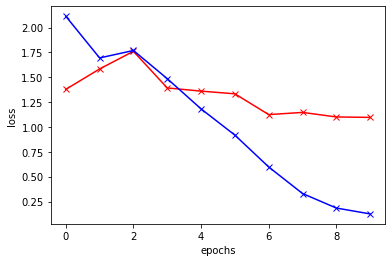

In [ ]:
plt.plot(time, val_loss, c='red', label='val_loss', marker='x')
plt.plot(time, train_loss, c='blue', label='train_loss', marker='x')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

Más hiperparaméterek mellett, lehet eredményesebb lett volna az ADAM optimalizáló használata, de így a diagrammon is látható, hogy a modell így túlilleszkedett a tanító halmazra.


### **3. A modell pontosságának mérése tanítás előtt: 1,4%**

In [ ]:
evaluate(VggModel, test_dl)

{'val_acc': 0.014702772721648216, 'val_loss': 3.9181888103485107}

**Hiperparaméterek beállítása**

In [ ]:
num_epochs = 10
opt_func = torch.optim.SGD
max_lr = 0.001
grad_clip = 0.1
weight_decay = 1e-4

### **4. VGG tanítása (SGD-vel)**

In [ ]:
history = fit_one_cycle(num_epochs, max_lr, VggModel, train_dl, val_dl, weight_decay, grad_clip, opt_func)

  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [0] : train_loss: 3.8913, val_loss: 3.7151, val_acc: 0.1345


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [1] : train_loss: 2.4861, val_loss: 0.9510, val_acc: 0.7191


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [2] : train_loss: 1.1077, val_loss: 0.7871, val_acc: 0.7530


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [3] : train_loss: 0.7897, val_loss: 0.6635, val_acc: 0.7869


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [4] : train_loss: 0.6188, val_loss: 0.6086, val_acc: 0.8209


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [5] : train_loss: 0.5150, val_loss: 0.5958, val_acc: 0.8105


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [6] : train_loss: 0.4235, val_loss: 0.6184, val_acc: 0.8209


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [7] : train_loss: 0.3472, val_loss: 0.5605, val_acc: 0.8379


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [8] : train_loss: 0.2794, val_loss: 0.5676, val_acc: 0.8365


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [9] : train_loss: 0.2528, val_loss: 0.5578, val_acc: 0.8418


### **Teszthalmazon a végeredmény: 83%**

In [ ]:
result = evaluate(VggModel, test_dl)
result

{'val_acc': 0.8339285850524902, 'val_loss': 0.6076076626777649}

### **5. Tanítás elemzése diagrammokon**

In [ ]:
val_loss = []
train_loss = []
val_acc = []
time = list(range(len(history)))
for h in history:
    val_loss.append(h['val_loss'])
    train_loss.append(h['train_loss'])
    val_acc.append(h['val_acc'])

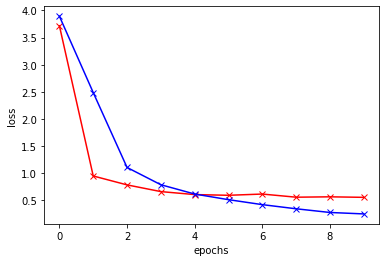

In [ ]:
plt.plot(time, val_loss, c='red', label='val_loss', marker='x')
plt.plot(time, train_loss, c='blue', label='train_loss', marker='x')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

Itt az előzőhöz képest sokkal magasabb pontosságot sikerült elérni, a diagrammon itt már látható, hogy a 4. epoch után bekövetkező túlilleszkedés már kevésbé látványos.

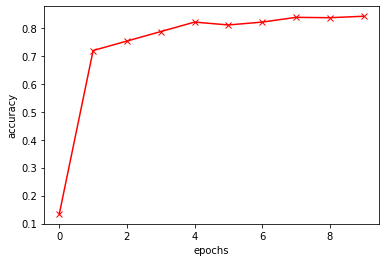

In [ ]:
plt.plot(time, val_acc, c='red', label='accuracy', marker='x')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

Már az első epoch után nagyon jó eredményeket kaptunk, a későbbiek ezt már csak kis mértékekben, de tovább növelték.

### **6.Betanított modell elmentése és újratöltése**

In [ ]:
torch.save(VggModel, 'modelVgg.pth')

In [ ]:
mentett = torch.load('modelVgg.pth')

# **GoggleNet**

---



**Modell áttekintése:**
Ez a modell is 2014-ben jelent meg, a VGG vetélytársa volt. Az ImageNet-en vele is 7%-os hibaarányt sikerült elérni.

Ennél am odellnél használtak először batch normalizációt, mellyel a tanítás sokkal robosztusabbá vált és kevésbé volt érzékeny a bemenet inicializálására.

22rétegből áll és kb 5 millió súlyból.

A modell architechtúrájában több elágazás is megjelenik, ennek oka, hogy nem tudhatjuk előre, hogy mekkora kernelméret szükséges, ezért egy-egy szinten több különböző méretűvel is számol és utána az eredményeiket összehasonlítja.

Több belső rétegnél is vannak kimenetei (a végleges kimenet mellett), ezek mentén is visszaterjeszti a hibát.

### **1. A GoogleNet importálása és az utolsó rétegének átalakítása a mi adathamazunknak megfelelően**

In [ ]:
class DogBreedGoogleNet(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        
        self.network = models.googlenet(pretrained=True)
        # Replace last layer
        num_ftrs = self.network.fc.in_features
        self.network.fc = nn.Sequential(
            nn.Linear(num_ftrs, 50),
            nn.LogSoftmax(dim=1)
        )
        
    def forward(self, xb):
        return self.network(xb)

### **2. Modell példányosítása és átvitele a GPU-ra:**

In [ ]:
GoogleNetModel = DogBreedGoogleNet()
GoogleNetModel

In [ ]:
to_device(GoogleNetModel, device);

### **3. A modell pontosságának mérése tanítás előtt: 1.84%**

In [ ]:
evaluate(GoogleNetModel, test_dl)

{'val_acc': 0.0184151791036129, 'val_loss': 3.9426140785217285}

###hiperparaméterek beállítása

In [ ]:
num_epochs = 10
opt_func = torch.optim.SGD
max_lr = 0.001
grad_clip = 0.1
weight_decay = 1e-4

### **4. GoogleNet tanítása**

In [ ]:
history_GoogleNet = fit_one_cycle(num_epochs, max_lr, GoogleNetModel, train_dl, val_dl, weight_decay, grad_clip, opt_func)

  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [0] : train_loss: 3.8679, val_loss: 3.6781, val_acc: 0.1852


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [1] : train_loss: 3.3566, val_loss: 2.8869, val_acc: 0.5548


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [2] : train_loss: 2.4659, val_loss: 1.9726, val_acc: 0.6919


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [3] : train_loss: 1.7333, val_loss: 1.4124, val_acc: 0.7807


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [4] : train_loss: 1.3118, val_loss: 1.1031, val_acc: 0.7963


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [5] : train_loss: 1.0723, val_loss: 0.9363, val_acc: 0.8160


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [6] : train_loss: 0.9253, val_loss: 0.8342, val_acc: 0.8212


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [7] : train_loss: 0.8400, val_loss: 0.7854, val_acc: 0.8382


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [8] : train_loss: 0.7948, val_loss: 0.7573, val_acc: 0.8395


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [9] : train_loss: 0.7753, val_loss: 0.7594, val_acc: 0.8355


###**Teszthalmazon a végeredmény: 84.7%**

In [ ]:
result_GoogleNet = evaluate(GoogleNetModel, test_dl)
result_GoogleNet

{'val_acc': 0.8473449349403381, 'val_loss': 0.7261871695518494}

### **5. Tanítás elemzése diagrammokon**

### Diagrammok összeállítása

In [ ]:
val_loss_GN = []
train_loss_GN = []
val_acc_GN = []
time_GN = list(range(len(history_GoogleNet)))
for h in history_GoogleNet:
    val_loss_GN.append(h['val_loss'])
    train_loss_GN.append(h['train_loss'])
    val_acc_GN.append(h['val_acc'])

In [ ]:
plt.plot(time_GN, val_loss_GN, c='red', label='validation loss', marker='x')
plt.plot(time_GN, train_loss_GN, c='green', label='train loss', marker='x')
plt.xlabel('epochs')
plt.ylabel('loss')

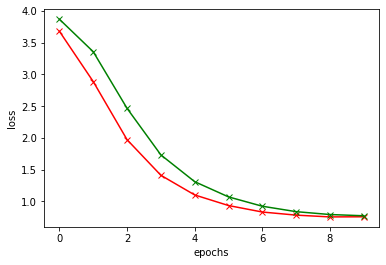

In [ ]:
plt.show()

Ennél a modellnél a túltanulás egyáltalán nem jelentkezik, nagyon szép és egyenletes ívet ír le a tesztelő és validációs halmaz is. Bár az eredménye majdnem megegyezik a VGG eredményével, ez sokkal robosztusabb megoldásnak látszik és tényleg sikerült azokra az információkra rátanulnia, amelyek a legfontosabbak voltak.

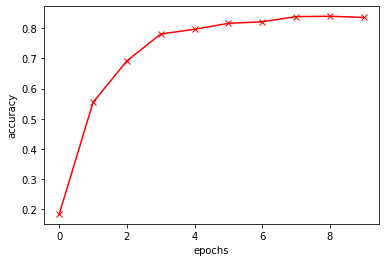

In [ ]:
plt.plot(time_GN, val_acc_GN, c='red', label='accuracy', marker='x')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

### **6.Betanított modell elmentése és újratöltése**

In [ ]:
torch.save(GoogleNetModel, 'modelGoogleNet.pth')

In [ ]:
mentett = torch.load('modelGoogleNet.pth')

###7.Ezt a modellt megpróbáltuk 20 epoch-ig tanítani, de ez sem mutatott sokkal jobb eredményt, 85,2% lett

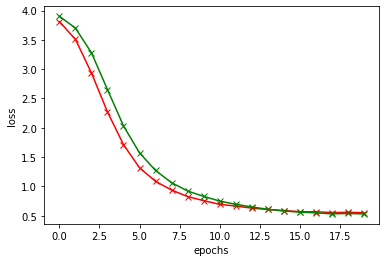

In [ ]:
plt.plot(time_GN, val_loss_GN, c='red', label='validation loss', marker='x')
plt.plot(time_GN, train_loss_GN, c='green', label='train loss', marker='x')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

A tanulás mértéke folyamatosan lassúl, több epochra történő tanítással így már nem lehet jelentős javulást elérni.

# **RESNET**

**Modell áttekintése:**

Ez a modell 2015-ben indult az ImageNet-en és nyerte meg 4%-os hibaaránnyal.

A modell nagy újítása az úgynevezett *Residual connection*-ok használata volt (más néven *skipp connection*). Ezek a plusz kapcsolatok több rétegen átívelve csatlakoztak egy másikhoz, előnyük pedig az volt, hogy ezeken keresztül is lehetett a hibát visszaterjeszteni, mely sokkal egyszerűbb és rövidebb volt.
 Ez nagyban megkönnyítette a mély hálók kezelését, így ennek a modellnek a rétegszáma akár 34, 64 vagy 152 is lehetett.

 Mi a 34 rétegű betanított ResNet modellt használtuk.


### **1. A ResNet34 importálása és az utolsó rétegének átalakítása a mi adathamazunknak megfelelően**

In [ ]:
class DogBreedResnet34(ImageClassificationBase):
    def __init__(self):
        super().__init__()       
        self.network = models.resnet34(pretrained=True)

        num_ftrs = self.network.fc.in_features
        self.network.fc = nn.Sequential(
            nn.Linear(num_ftrs, 50),
            nn.LogSoftmax(dim=1)
        )
        
    def forward(self, xb):
        return self.network(xb)

### **2. Modell példányosítása és átvitele a GPU-ra:**

In [ ]:
ResnetModel = DogBreedResnet34()
ResnetModel

In [ ]:
to_device(ResnetModel, device);

### **3. A modell pontosságának mérése tanítás előtt: 0.96%**

In [ ]:
evaluate(ResnetModel, test_dl)

{'val_acc': 0.009680450893938541, 'val_loss': 4.199522018432617}

### 4.hiperparaméterek beállítása

In [ ]:
num_epochs = 10
opt_func = torch.optim.SGD
max_lr = 0.001
grad_clip = 0.1
weight_decay = 1e-4

### **4. ResNet tanítása**

In [ ]:
history_RN = fit_one_cycle(num_epochs, max_lr, ResnetModel, train_dl, val_dl, 
                           weight_decay, grad_clip, opt_func)

  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [0] : train_loss: 3.6689, val_loss: 2.8979, val_acc: 0.4453


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [1] : train_loss: 1.8890, val_loss: 1.0716, val_acc: 0.7990


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [2] : train_loss: 0.8588, val_loss: 0.6352, val_acc: 0.8461


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [3] : train_loss: 0.5721, val_loss: 0.5155, val_acc: 0.8695


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [4] : train_loss: 0.4484, val_loss: 0.4461, val_acc: 0.8760


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [5] : train_loss: 0.3688, val_loss: 0.4191, val_acc: 0.8761


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [6] : train_loss: 0.3184, val_loss: 0.3952, val_acc: 0.8721


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [7] : train_loss: 0.2772, val_loss: 0.3863, val_acc: 0.8839


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [8] : train_loss: 0.2572, val_loss: 0.3824, val_acc: 0.8852


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch [9] : train_loss: 0.2493, val_loss: 0.3813, val_acc: 0.8865


### **Teszthalmazon a végeredmény: 87.6%**

In [ ]:
result = evaluate(ResnetModel, test_dl)
result

{'val_acc': 0.8762629628181458, 'val_loss': 0.42587777972221375}

### **5. Tanítás elemzése diagrammokon**

### Diagrammok összeállítása

In [ ]:
import matplotlib.pyplot as plt
val_loss = []
train_loss = []
val_acc = []
time = list(range(len(history_RN)))
for h in history_RN:
    val_loss.append(h['val_loss'])
    train_loss.append(h['train_loss'])
    val_acc.append(h['val_acc'])

In [ ]:
plt.plot(time, val_loss, c='red', label='val_loss', marker='x')
plt.plot(time, train_loss, c='blue', label='train_loss', marker='x')
plt.xlabel('epochs')
plt.ylabel('loss')

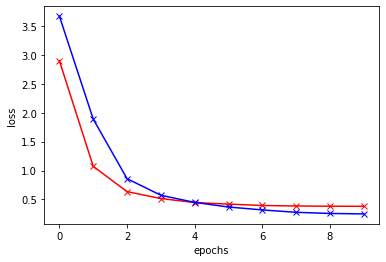

In [ ]:
plt.show()

Ez a modell 87%os eredményt ért el, amely az eddigiekhez képest nagyon szép eredmény. Ez az érték az 5.epoch után azonban már nem tudott sokkal fejebb menni, a validációs hiba onnantól kezdve már nem csökkent tovább, ebből következtethetően valószínűleg a több epochra való tanítás sem lenne jobb. 

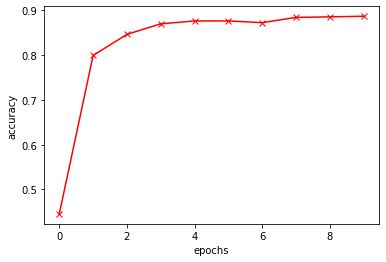

In [ ]:
plt.plot(time, val_acc, c='red', label='accuracy', marker='x')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

### **6.Betanított modell elmentése és újratöltése**

In [ ]:
mentett = torch.load('ResnetModel.pth')
torch.save(ResnetModel, 'ResnetModel.pth')

# **DENSENET**

**Modell áttekintése:**

Az utoljára vizsgált modellünk 2017-ben nyerte meg az ImageNet versenyt, 2%-os hibaaránnyal. Ezt az eredményt már szinte tökéletesnek tekintették, így ezután már *megoldottnak* tekintették a képosztályozási feladatot.
A ResNet-hez hasonlítva nagy áttörés volt itt, hogy az egyes Konvolúciós rétegek nem csak az előttük lévő rétegtől függnek, hanem minden korábbi rétegtől is. Ennek elérése érdekében kapcsolatokat adtak minden rétegből, minden őt megelőzőbe.

Ezáltal a tanítás lassabb. de sokkal eredményesebb lett, hiszen így a különböző helyen lévő rétegek összefüggéseit is remekül figyelembe tudja venni a háló.

### **1. A DenseNet importálása és az utolsó rétegének átalakítása a mi adathamazunknak megfelelően**

In [ ]:
class DogBreedDenseNet(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        
        self.network = models.densenet161(pretrained=True)
        # Utolsó réteg lecserélése
        num_ftrs = self.network.classifier.in_features
        self.network.classifier = nn.Sequential(
            nn.Linear(num_ftrs, 50),
            nn.LogSoftmax(dim=1)
        )
        
    def forward(self, xb):
        return self.network(xb)

### **2. Modell példányosítása és átvitele a GPU-ra:**

In [ ]:
DenseNetModel = DogBreedDenseNet()
DenseNetModel

In [ ]:
to_device(DenseNetModel, device);

### **3. A modell pontosságának mérése tanítás előtt: 1.19%**

In [ ]:
evaluate(DenseNetModel, test_dl)

{'val_acc': 0.01193181797862053, 'val_loss': 3.967029333114624}

### 4.hiperparaméterek beállítása

In [ ]:
num_epochs_DN = 5
opt_func_DN = torch.optim.SGD
max_lr_DN = 0.001
grad_clip_DN = 0.1
weight_decay_DN = 1e-4

### **4. DenseNet tanítása**
két kölön ciklusban kellett indítani a tanítást, mert a modell mérete miatt a Google Colab nem bírta egyben. 

In [ ]:
history_DN1 = fit_one_cycle(num_epochs_DN, max_lr_DN, DenseNetModel, train_dl, val_dl,
                            weight_decay_DN, grad_clip_DN, opt_func_DN)

  0%|          | 0/792 [00:00<?, ?it/s]

Epoch [0] : train_loss: 2.4804, val_loss: 0.7369, val_acc: 0.8366


  0%|          | 0/792 [00:00<?, ?it/s]

Epoch [1] : train_loss: 0.5652, val_loss: 0.4305, val_acc: 0.8635


  0%|          | 0/792 [00:00<?, ?it/s]

Epoch [2] : train_loss: 0.2978, val_loss: 0.3769, val_acc: 0.8707


  0%|          | 0/792 [00:00<?, ?it/s]

Epoch [3] : train_loss: 0.1909, val_loss: 0.3783, val_acc: 0.8849


  0%|          | 0/792 [00:00<?, ?it/s]

Epoch [4] : train_loss: 0.1396, val_loss: 0.3577, val_acc: 0.8849


In [ ]:
history_DN = history_DN1 + fit_one_cycle(num_epochs_DN, max_lr_DN, DenseNetModel,
                   train_dl, val_dl,  weight_decay_DN, grad_clip_DN, opt_func_DN)

  0%|          | 0/792 [00:00<?, ?it/s]

Epoch [0] : train_loss: 0.1353, val_loss: 0.3699, val_acc: 0.8791


  0%|          | 0/792 [00:00<?, ?it/s]

Epoch [1] : train_loss: 0.1279, val_loss: 0.4091, val_acc: 0.8693


  0%|          | 0/792 [00:00<?, ?it/s]

Epoch [2] : train_loss: 0.0983, val_loss: 0.4058, val_acc: 0.8834


  0%|          | 0/792 [00:00<?, ?it/s]

Epoch [3] : train_loss: 0.0659, val_loss: 0.3814, val_acc: 0.8920


  0%|          | 0/792 [00:00<?, ?it/s]

Epoch [4] : train_loss: 0.0442, val_loss: 0.3814, val_acc: 0.8920


###**Teszthalmazon a végeredmény: 90,3%**

In [ ]:
result = evaluate(DenseNetModel, test_dl)
result

{'val_acc': 0.9033357501029968, 'val_loss': 0.344691663980484}

### **5. Tanítás elemzése diagrammokon**

### Diagrammok összeállítása

In [ ]:
val_loss = []
train_loss = []
val_acc = []
time_DN = list(range(len(history_DN)))
for h in history_DN:
    val_loss.append(h['val_loss'])
    train_loss.append(h['train_loss'])
    val_acc.append(h['val_acc'])

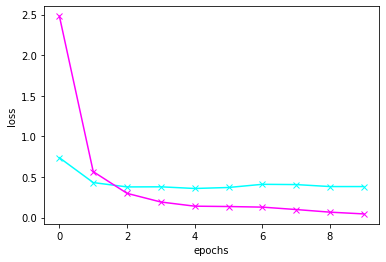

In [ ]:
plt.plot(time_DN, val_loss, c='cyan', label='val_loss', marker='x')
plt.plot(time_DN, train_loss, c='magenta', label='train_loss', marker='x')
plt.xlabel('epochs')
plt.ylabel('loss')
  
plt.show()

Ez a modell már a legelső epoch után jobb eredményt ért el, mint az összes eddigi, nagyon hamar rátanult a megfelelő mintákra.
A továbbiakban azonban ezen az eredményen már csak keveset tudott javítani.

Ez a modell több mint 8 órán keresztül futott, a nagyon nagy felépíése és a sok összeköttetés miatt.
De összességében ezzel lehetett  legjobb eredményt elérni. 

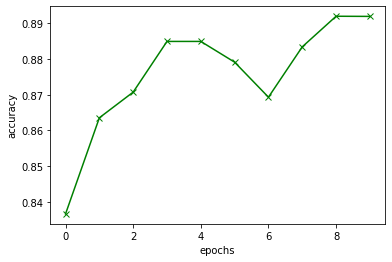

In [ ]:
plt.plot(time_DN, val_acc, c='green', label='accuracy', marker='x')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

Már az első eredmény 84%os pontosságú volt, ezután csak egy két százalékos javulást sikerült elérni.

### **6.Betanított modell elmentése és újratöltése**

In [ ]:
torch.save(DenseNetModel, 'modelDenseNet.pth')

In [ ]:
mentett = torch.load('modelDenseNet.pth')

# **IV. Random mintapéldák, melyekre a modell rosszul tippelt**
Ezeket a VGG modellen próbáltam ki, de a használni kívánt modell bármelyikre beállítható.

In [ ]:
def predict_single(img, label):
    xb = img.unsqueeze(0) # extra dimenzió hozzáadása
    xb = to_device(xb, device)
    #Itt kell beállítani, hogy melyik modellt szeretnénk használni
    preds = VggModel(xb)         
    predictions = preds[0]
    
    max_val, kls = torch.max(predictions, dim=0)
    if (kls != label):  #akkor jelenítsük meg, ha tévedtünk.
       print( ' | Predicted :', breeds[kls])
       print( ' | Real :', breeds[label])
       plt.imshow(img.permute(1,2,0))
       plt.show()

In [ ]:
from random import randrange
for x in range(100):
  predict_single(*test_dataset[randrange(len(test_ds)-1)])

# **V. Különböző modellek eredményeinek összehasonlítása**

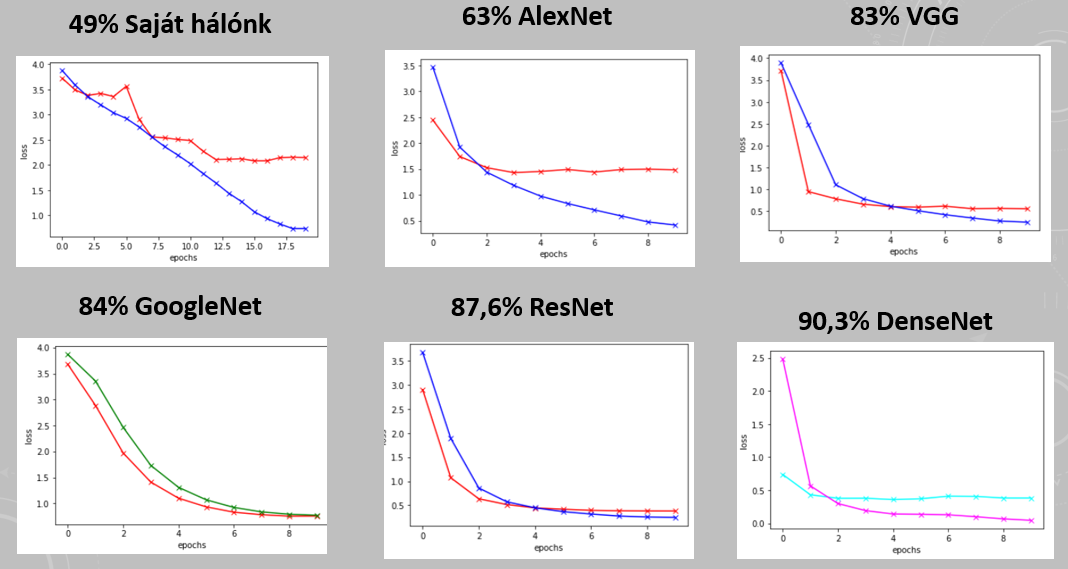

A hálok eredmény szerinti sorrendje nálunk is megegyezik az ImageNet-en elért sorrenddel. Látszik hogy minél újabb architektúrát választottunk, annál jobb pontosságot sikerült elérnünk. Minden háló tanításának elemzése külön-külön megtalálható az adott feladat alatt, itt csak az egymáshoz viszonyítás érdekében jelenítettük meg őket újra.

Nálunk a hálónak egyetlenegy tippelési lehetősége volt, míg az ImageNet-en 5 tippet is adhatott a háló, ezért a kettőn elért pontosságok nem teljesen hasonlíthatóak össze, mivel mi sokkal szigorúbb megkötést adtunk.

Az újabb modellek használatávak nem csak a pontosság nőt meg, de a tanítási idő és a GPU használat is. Míg az AlexNet-nek 10-20 percre volt szüksége 10 epochnyi transzfer learining.es tanításhoz, a DenseNet-nek már 6-8 órába telt ugyanez.

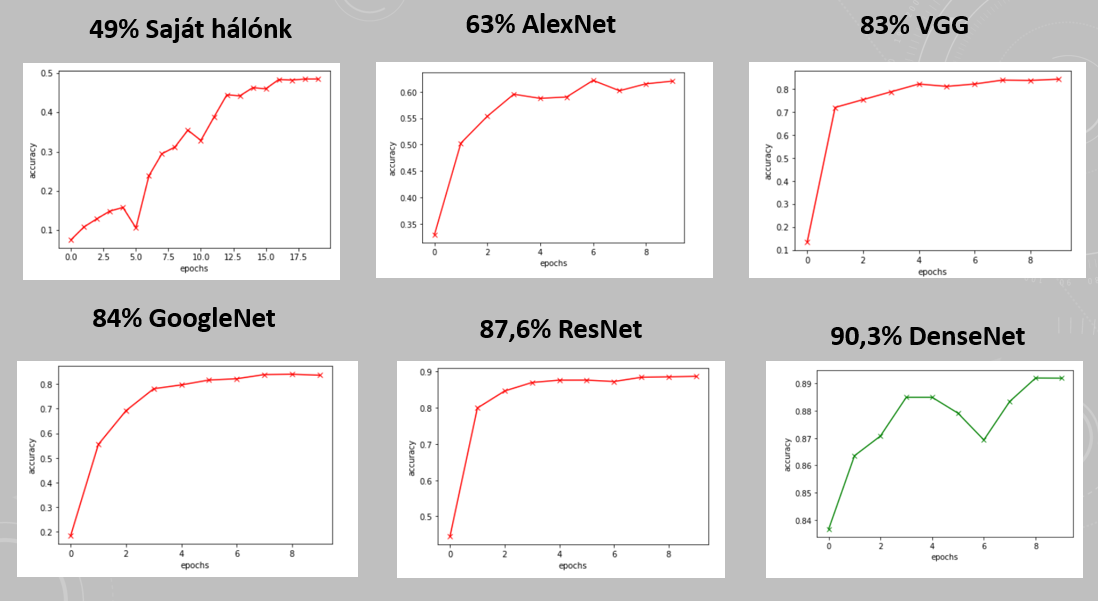

Szerettünk volna többféle hiperparamétert is kipróbálni a többféle modellel és azokat is összehasonlítani, erre azonban sajnos nem volt lehetőségünk, mivel a tanítási idők így is nagyon magasak voltak (6-8óra a nagyobb modelleknél) és a Google Colab-ban lévő GPU korlátozások miatt sokszor napokra elvesztettük a használati jogot.

A feladat folytatásaként azonban érdemes lehet majd ezeket is megvizsgálni a jövőben, azonban ezt saját gépen, saját GPU-n lenne érdemes.

### **Saját tapasztalat**

Mindkettőnknek ez volt az első találkozása a CNN-ek világával. 
Így az elején sokat küzdöttünk a feladattal, a Pytorch függvényeinek megismerésével valamint a CNN felépítésének lépéseivel.
Azonban a projekt elkészítése alatt rengeteget fejlődnünk, tanultunk és miután sikerült megértenünk az alapokat már nagyon jól tudtunk haladni.

A választott adathalmazban nagyon sokféle kép volt, a kutyán kívül sok más zavaró tényező is előfordult a képen és még sok kutyafaj is nagyon hasonlított egymásra. Emiatt úgy gondoltuk, hogy nagy kihívás elé állítjuk a hálót.

Végeredményként azonban a vártnál sokkal jobb eredményeket sikerült elérnünk, ezáltal megtapasztaltuk a CNN-ek valódi erejét.  